In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import lasio # Using lasio.read() directly doesn't give full control over this specific format

In [10]:
# Read the LAS file (But had to do it as text file so we can extract data manually)
with open('dataset/Sample_Well_Data.las', 'r') as file:
    lines = file.readlines()

#Get headers
headers = lines[64].strip('# \n').split('\t')
headers = [header.strip() for header in headers]

# Find the line where data starts (line 68, index 67)
data_start_idx = 67

# Parse data lines into a list of lists
data = []
for i in range(data_start_idx, len(lines)):
    if lines[i].strip() and not lines[i].startswith('#') and not lines[i].startswith('~'):
        # Split by tabs or multiple spaces and convert to appropriate data types
        row_values = [float(val) if val.strip() else np.nan for val in lines[i].split() if val.strip()]
        if row_values:  # Only add non-empty rows
            data.append(row_values)

# Create DataFrame with headers and data
MainDF = pd.DataFrame(data, columns=headers)

# Display the first few rows of the DataFrame
print("DataFrame with headers from row 65:")
print(MainDF.head())

DataFrame with headers from row 65:
   Depth(ft)  Rate2 Of Penetration (ft/h)  Stand Pipe Pressure (psi)  \
0       23.0                        117.6                      45.19   
1       24.0                          0.0                      42.37   
2       25.0                        120.9                      49.75   
3       26.0                         98.9                      68.31   
4       27.0                        111.8                      64.84   

   Pump flow (gpm)  Bit Run (ft)  Bit Time (h)  TotalRotaryTime (h)  \
0           151.01           1.2          0.03                97.31   
1           151.01           1.6          0.04                97.33   
2           151.01           2.1          0.04                97.33   
3           151.01           2.8          0.05                97.34   
4           151.01           3.4          0.06                97.35   

   RotaryTimeOnBottom (h)  
0                    0.25  
1                    0.26  
2                   

In [ ]:
print(MainDF.columns.tolist())

['Depth(ft)', 'Rate2 Of Penetration (ft/h)', 'Stand Pipe Pressure (psi)', 'Pump flow (gpm)', 'Bit Run (ft)', 'Bit Time (h)', 'TotalRotaryTime (h)', 'RotaryTimeOnBottom (h)']


In [ ]:
MainDF['Pump flow (gpm)'].std()

194.57132564916785

In [20]:
range = MainDF['Pump flow (gpm)'].max()-MainDF['Pump flow (gpm)'].min()
print(range)

979.71


In [21]:
MainDF.describe()

,Depth(ft),Rate2 Of Penetration (ft/h),Stand Pipe Pressure (psi),Pump flow (gpm),Bit Run (ft),Bit Time (h),TotalRotaryTime (h),RotaryTimeOnBottom (h)
count,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000
mean,2019.000000,184.508239,2013.329447,739.340729,1036.363336,7.479046,25.038517,5.741673
std,1152.824141,99.491175,850.453636,194.571326,820.394741,4.843960,31.640701,3.894592
min,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1021.000000,116.200000,1392.520000,707.550000,309.500000,3.490000,7.560000,2.260000
50%,2019.000000,171.300000,2389.870000,841.340000,766.400000,6.570000,13.630000,5.220000
75%,3017.000000,242.500000,2640.430000,847.150000,1730.700000,11.550000,25.740000,8.850000
max,4015.000000,1082.600000,3020.070000,979.710000,2728.600000,17.450000,133.990000,13.840000


<Axes: ylabel='Pump flow (gpm)'>

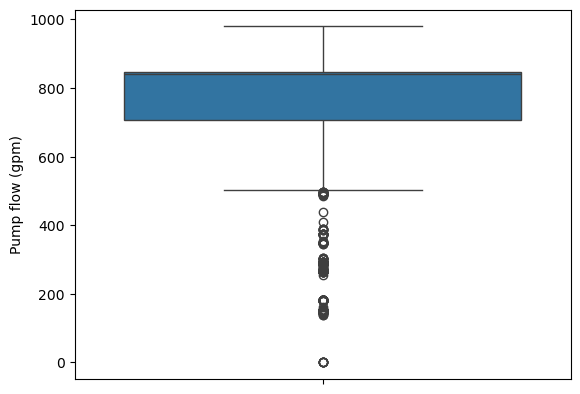

In [22]:
sns.boxplot(MainDF['Pump flow (gpm)'])

<Axes: ylabel='Rate2 Of Penetration (ft/h)'>

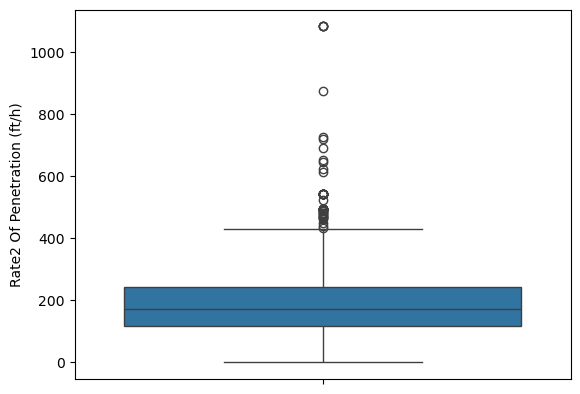

In [23]:
sns.boxplot(MainDF['Rate2 Of Penetration (ft/h)'])

<Axes: ylabel='Frequency'>

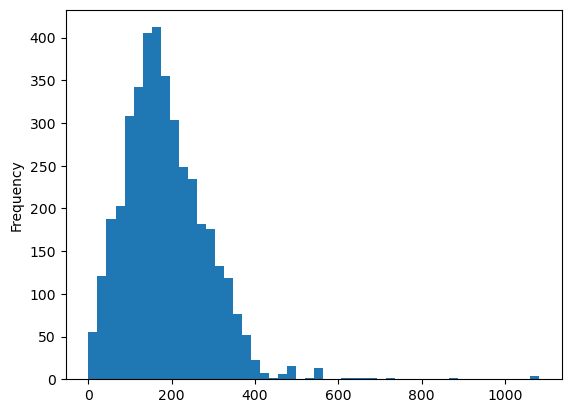

In [ ]:
#plt.figure(figsize=(40,12))
#sns.boxplot(x= MainDF['Rate2 Of Penetration (ft/h)'], y= MainDF['RotaryTimeOnBottom (h)'], data= MainDF)
